# Thông tin

1.MSSV: 20520435

2.Họ tên: Nguyễn Duy Đạt

3.Bài tập: 5

4.Ngày thực hiện: 29/4/2022

# Bài tập 5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Baitap5/images/"

/content/drive/.shortcut-targets-by-id/13C37EedUSDnRymGA5rWpsqcry8w0txyr/CS231.M21.KHTN/Baitap/Baitap5/images


# Thực hành 1 - Baitap5
# Áp dụng phân đoạn ảnh cho các ảnh:
1. Chọn ngưỡng: global

  - particles.bmp

  - Phandoan01.jpg

  - wdg2.jpg

  - Rice.png
2. Chọn ngưỡng: 
  Adaptive
  
  - Ảnh wdg3.jpg


In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
def drawHist(x):
  hist = cv.calcHist([x], [0], None, [256], [0, 256])
  plt.plot(hist)
  plt.xlim([0, 256])
  plt.legend(('histogram'), loc = 'upper left')
  plt.show()

- Chọn ngưỡng global

In [ ]:
def globalThresholding(img, thres=127):
  img_rst = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img_rst[i][j] < thres:
        img_rst[i][j] = 255
      else:
        img_rst[i][j] = 0
  cv2_imshow(img_rst)
  return img_rst

- Chọn ngưỡng Adaptive

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def adaptiveThresholding(f, nrow, ncol):
  g = f.copy()
  r = int(f.shape[0] / nrow)
  c = int(f.shape[1] / ncol)
  for i in range(int(nrow)):
    for j in range(int(ncol)):
      x = f[i * r : (i + 1) * r, j * c : (j + 1) * c]
      cv2_imshow(x)
      drawHist(x)
      #t = np.average(x)
      t = int(input())
      g[i * r : (i + 1) * r, j * c : (j + 1) * c] = globalThresholding(x, t)
  return g

Image source: 


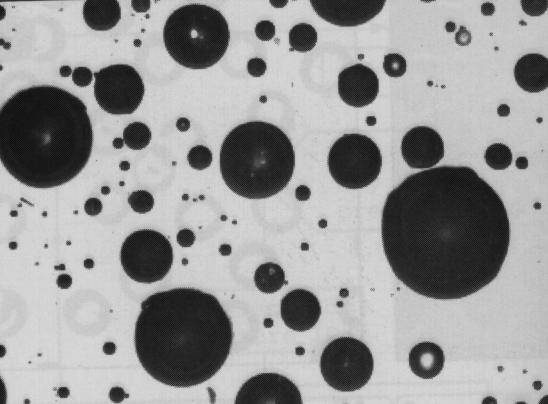

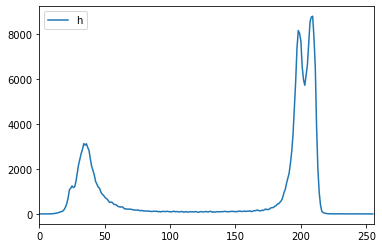

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Image with global threshold: 


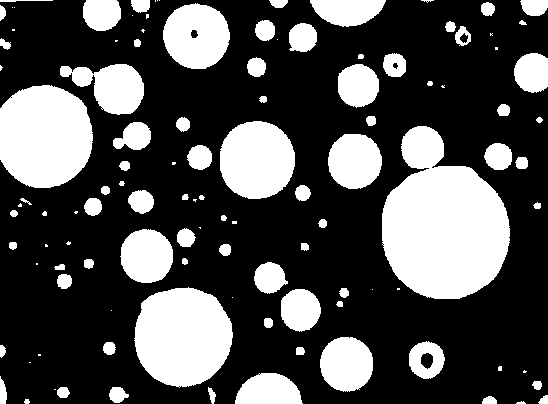

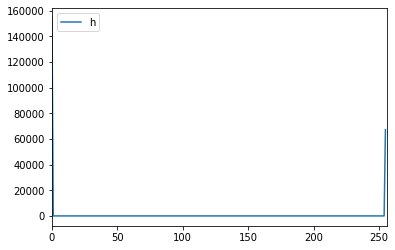

In [ ]:
print('Image source: ')
img = cv.imread('particles.bmp', 0)
cv2_imshow(img)
drawHist(img)
print('-------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------')
print('Image with global threshold: ')
drawHist(globalThresholding(img))

Image source: 


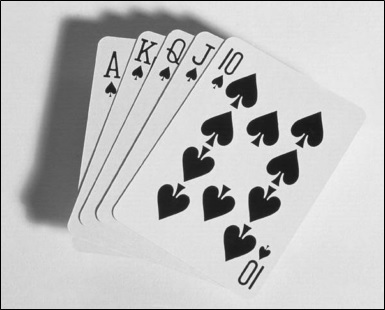

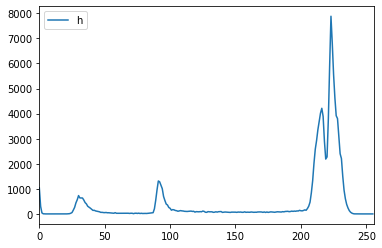

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Image with global threshold: 


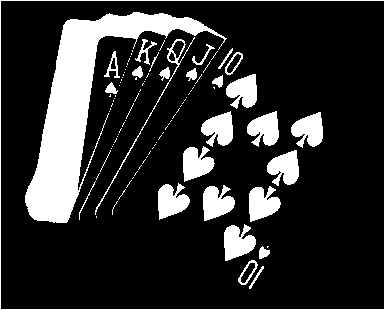

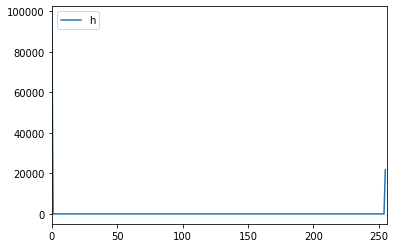

In [ ]:
print('Image source: ')
img = cv.imread('Phandoan01.jpg', 0)
cv2_imshow(img)
drawHist(img)
print('-------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------')
print('Image with global threshold: ')
drawHist(globalThresholding(img))

Image source: 


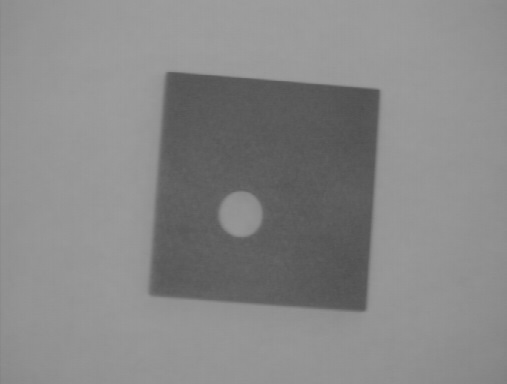

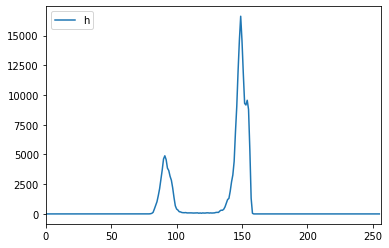

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Image with global threshold: 


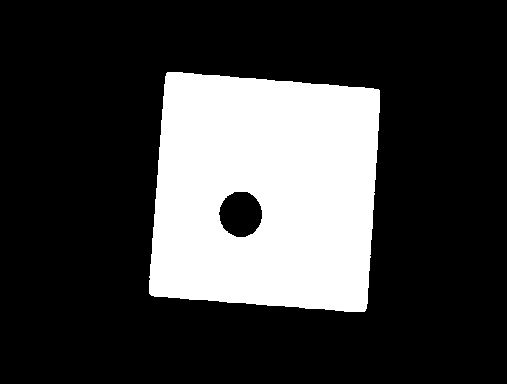

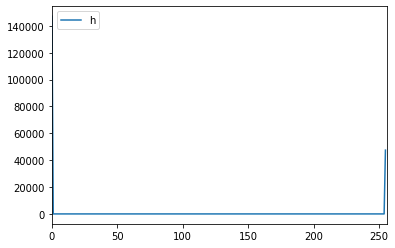

In [ ]:
print('Image source: ')
img = cv.imread('wdg2.jpg', 0)
cv2_imshow(img)
drawHist(img)
print('-------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------')
print('Image with global threshold: ')
drawHist(globalThresholding(img))

Image source: 


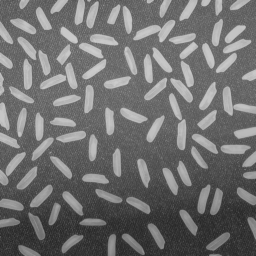

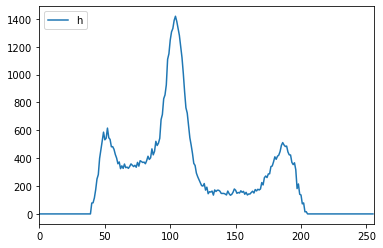

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Image with global threshold: 


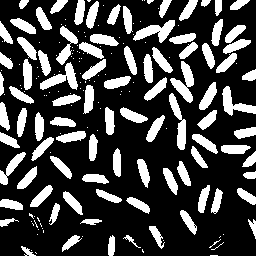

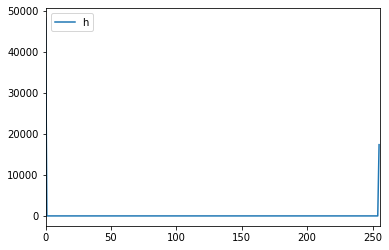

In [ ]:
print('Image source: ')
img = cv.imread('rice.png', 0)
cv2_imshow(img)
drawHist(img)
print('-------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------')
print('Image with global threshold: ')
drawHist(globalThresholding(255-img))

- Chọn ngưỡng Adaptive

Image source: 


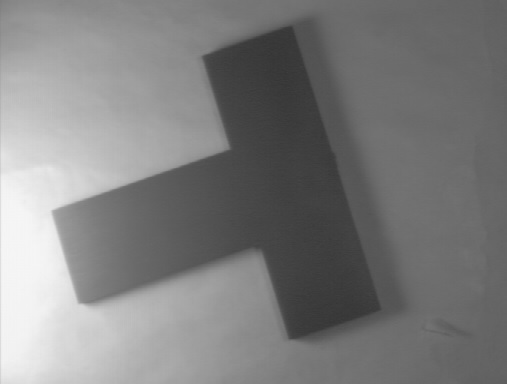

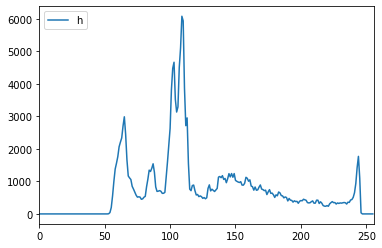

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Image with global threshold: 


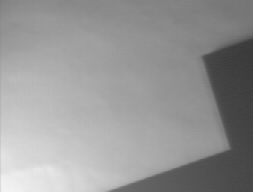

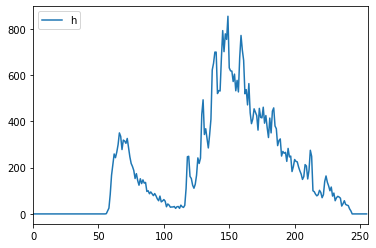

50


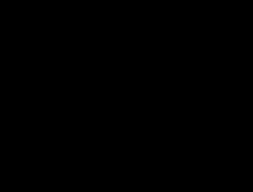

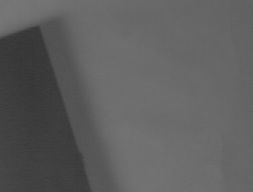

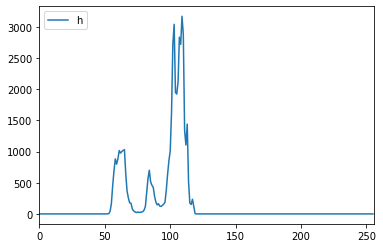

100


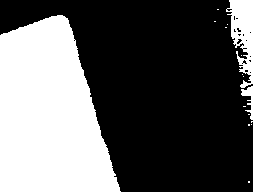

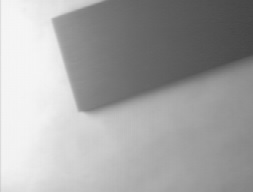

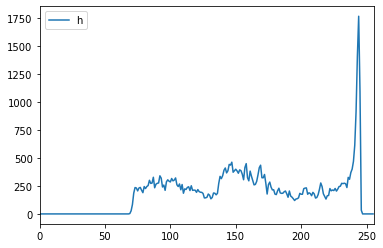

150


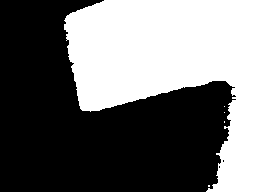

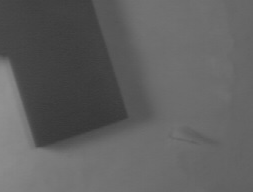

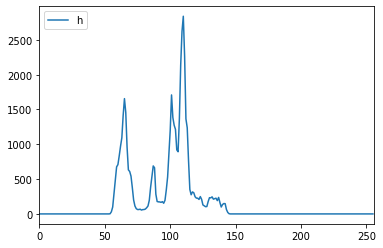

200


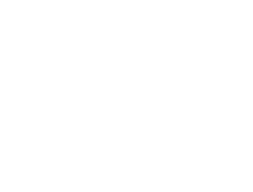

array([[  0,   0,   0, ..., 255, 255,  99],
       [  0,   0,   0, ..., 255, 255,  98],
       [  0,   0,   0, ..., 255, 255,  98],
       ...,
       [  0,   0,   0, ..., 255, 255,  96],
       [  0,   0,   0, ..., 255, 255,  96],
       [  0,   0,   0, ..., 255, 255,  94]], dtype=uint8)

In [ ]:
print('Image source: ')
img = cv.imread('wdg3.jpg', 0)
cv2_imshow(img)
drawHist(img)
print('-------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------')
print('Image with global threshold: ')
adaptiveThresholding(img, 2, 2)

# Thực hành 2 - Baitap5

-> Áp Dụng Kmeans

-  Representing each pixel as (r,g,b)

  + Áp dụng cho ảnh: vegetables.jpg, hand.jpg, thuoc.jpg 

-  Represent each pixel as (r,g,b,x,y)

  + Áp dụng cho ảnh: vegetables.jpg và thuoc.jpg
  -----------------------------------------------------

-> Áp Dụng MeanShift, FCM

-  Representing each pixel as (r,g,b)

  + Áp dụng cho ảnh: vegetables.jpg, hand.jpg, thuoc.jpg, dogcat.jpg

-  Represent each pixel as (r,g,b,x,y)

  + Áp dụng cho ảnh: vegetables.jpg và thuoc.jpg

In [ ]:
!pip install fuzzy-c-means

# Create model option

- Define model with RGB

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from fcmeans import FCM

def model_RGB(img, opt, n_clusters = 6):
  img_tmp = img.copy()
  nrow, ncol,nchl = img.shape
  g = []
  for y in range(nrow):
    for x in range(ncol):
      tmp = [img_tmp[y,x][0], img_tmp[y,x][1], img_tmp[y,x][2]]
      g.append(tmp)
  
  arrcolor = np.random.rand(20,3) * 255

  if opt == 0:
    model = KMeans(n_clusters=n_clusters, random_state=0).fit(g)
    t = arrcolor[model.labels_]
  elif opt == 1:
    bandwidth = estimate_bandwidth(g, n_samples=1000)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding= True)
    ms.fit(g)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    center = cluster_centers[labels]
    t = center[:,0:3]
    img_res = t.reshape(nrow, ncol, nchl)
    img_res = img_res.astype(np.uint8)
  else:
    g = np.asarray(g)
    model = FCM(n_clusters = n_clusters)
    model.fit(g)
    t = model.predict(g)
    t = arrcolor[t]

  # t = k_means.cluster_centers_[k_means.labels_]
  img_res = img_tmp
  i = 0
  for y in range(nrow):
    for x in range(ncol):
      img_res[y, x] = t[i][0:3]
      i += 1
  cv2_imshow(img_res)

- Define model with RGBxy

In [ ]:
def model_RGBxy(img, opt, n_clusters = 6):
  img_tmp = img.copy()
  nrow, ncol,nchl = img.shape
  g = []
  for y in range(nrow):
    for x in range(ncol):
      tmp = [img_tmp[y,x][0], img_tmp[y,x][1], img_tmp[y,x][2], x, y]
      g.append(tmp)
  
  arrcolor = np.random.rand(20,3) * 255

  if opt == 0:
    model = KMeans(n_clusters=n_clusters, random_state=0).fit(g)
    t = arrcolor[model.labels_]
  elif opt == 1:
    bandwidth = estimate_bandwidth(g, n_samples=1000)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding= True)
    ms.fit(g)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    center = cluster_centers[labels]
    t = center[:,0:3]
    img_res = t.reshape(nrow, ncol, nchl)
    img_res = img_res.astype(np.uint8)
  else:
    g = np.asarray(g)
    model = FCM(n_clusters = n_clusters)
    model.fit(g)
    t = model.predict(g)
    t = arrcolor[t]

  # t = k_means.cluster_centers_[k_means.labels_]
  img_res = img_tmp
  i = 0
  for y in range(nrow):
    for x in range(ncol):
      img_res[y, x] = t[i][0:3]
      i += 1
  cv2_imshow(img_res)

## K-means

Image source: 


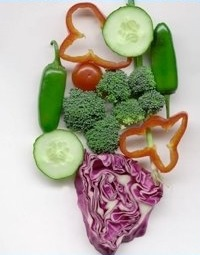

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
image with Kmeans_RGB (r,g,b):


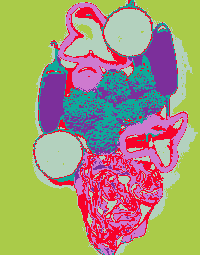

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
image with Kmeans_RGBxy (r,g,b,x,y):


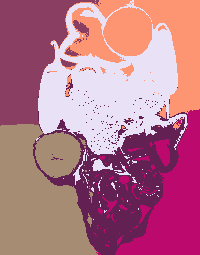

In [ ]:
img = cv.imread('vegetables.jpg')
print('Image source: ')
cv2_imshow(img)
print('-------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------')
print('image with Kmeans_RGB (r,g,b):')
model_RGB(img, opt = 0, n_clusters = 6)
print('-------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------')
print('image with Kmeans_RGBxy (r,g,b,x,y):')
model_RGBxy(img, opt = 0, n_clusters = 6)

Image source: 


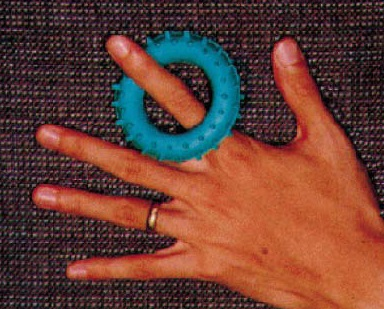

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
image with Kmeans_RGB (r,g,b):


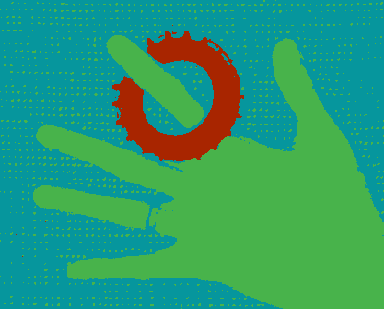

In [ ]:
img = cv.imread('hand.jpg')
print('Image source: ')
cv2_imshow(img)
print('-------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------')
print('image with Kmeans_RGB (r,g,b):')
model_RGB(img, opt = 0, n_clusters = 3)

Image source: 


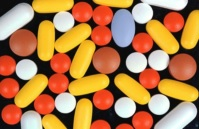

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
image with Kmeans_RGB (r,g,b):


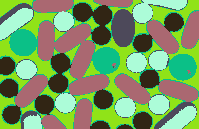

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
image with Kmeans_RGBxy (r,g,b,x,y):


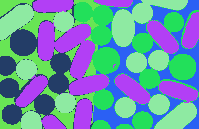

In [ ]:
img = cv.imread('thuoc.jpg')
print('Image source: ')
cv2_imshow(img)
print('-------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------')
print('image with Kmeans_RGB (r,g,b):')
model_RGB(img, opt = 0, n_clusters = 6)
print('-------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------')
print('image with Kmeans_RGBxy (r,g,b,x,y):')
model_RGBxy(img, opt = 0, n_clusters = 6)

## MeanShift

Image source: 


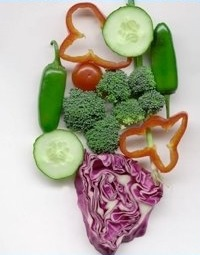

-------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
image with MeanShift_RGB (r,g,b):


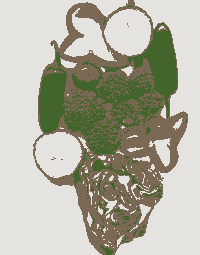

-------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
image with MeanShift_RGBxy (r,g,b,x,y):


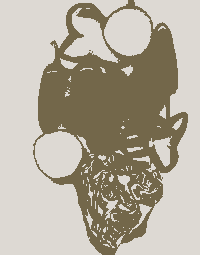

In [ ]:
img = cv.imread('vegetables.jpg')
print('Image source: ')
cv2_imshow(img)
print('-------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')
print('image with MeanShift_RGB (r,g,b):')
model_RGB(img, opt = 1)
print('-------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')
print('image with MeanShift_RGBxy (r,g,b,x,y):')
model_RGBxy(img, opt = 1)

Image source: 


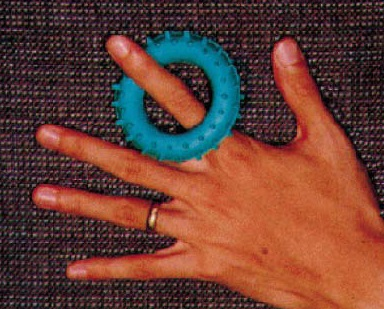

-------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
image with MeanShift_RGB (r,g,b):


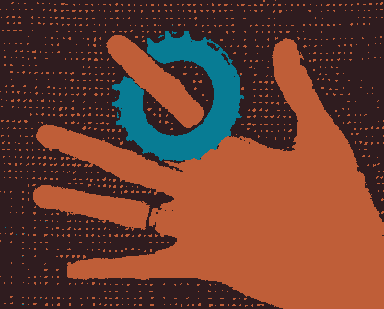

In [ ]:
img = cv.imread('hand.jpg')
print('Image source: ')
cv2_imshow(img)
print('-------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')
print('image with MeanShift_RGB (r,g,b):')
model_RGB(img, opt = 1)

Image source: 


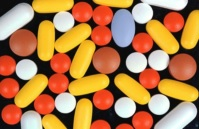

-------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
image with MeanShift_RGB (r,g,b):


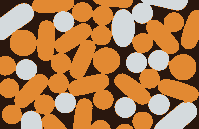

-------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
image with MeanShift_RGBxy (r,g,b,x,y):


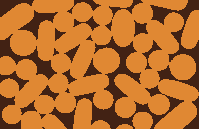

In [ ]:
img = cv.imread('thuoc.jpg')
print('Image source: ')
cv2_imshow(img)
print('-------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')
print('image with MeanShift_RGB (r,g,b):')
model_RGB(img, opt = 1)
print('-------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')
print('image with MeanShift_RGBxy (r,g,b,x,y):')
model_RGBxy(img, opt = 1)

Image source: 


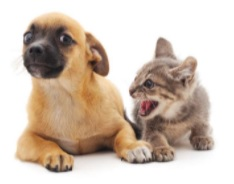

-------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
image with MeanShift_RGB (r,g,b):


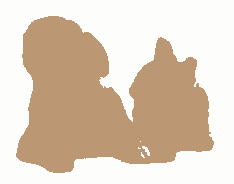

In [ ]:
img = cv.imread('dogcat.jpg')
print('Image source: ')
cv2_imshow(img)
print('-------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------')
print('image with MeanShift_RGB (r,g,b):')
model_RGB(img, opt = 1)

## FCM

Image source: 


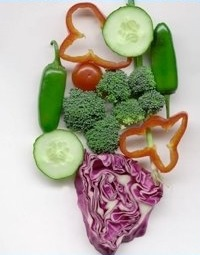

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
image with FCM_RGB (r,g,b):


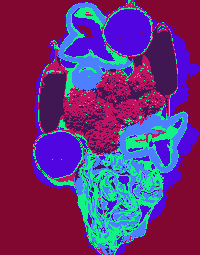

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
image with FCM_RGBxy (r,g,b,x,y):


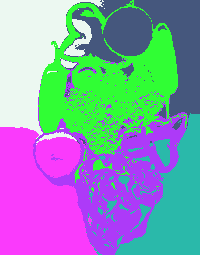

In [ ]:
img = cv.imread('vegetables.jpg')
print('Image source: ')
cv2_imshow(img)
print('-------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------')
print('image with FCM_RGB (r,g,b):')
model_RGB(img, opt = 2)
print('-------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------')
print('image with FCM_RGBxy (r,g,b,x,y):')
model_RGBxy(img, opt = 2)

Image source: 


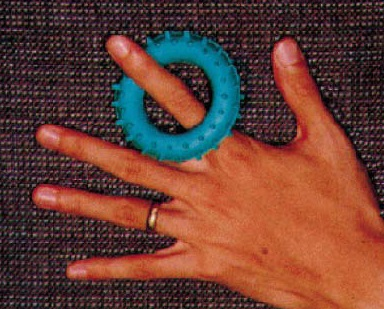

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
image with FCM_RGB (r,g,b):


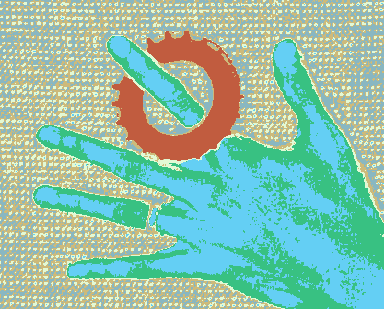

In [ ]:
img = cv.imread('hand.jpg')
print('Image source: ')
cv2_imshow(img)
print('-------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------')
print('image with FCM_RGB (r,g,b):')
model_RGB(img, opt = 2)

Image source: 


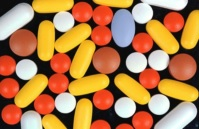

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
image with FCM_RGB (r,g,b):


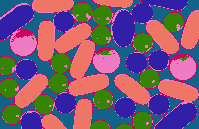

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
image with FCM_RGBxy (r,g,b,x,y):


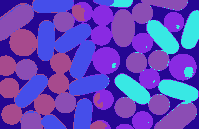

In [ ]:
img = cv.imread('thuoc.jpg')
print('Image source: ')
cv2_imshow(img)
print('-------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------')
print('image with FCM_RGB (r,g,b):')
model_RGB(img, opt = 2)
print('-------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------')
print('image with FCM_RGBxy (r,g,b,x,y):')
model_RGBxy(img, opt = 2)

Image source: 


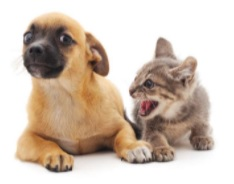

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
image with FCM_RGB (r,g,b):


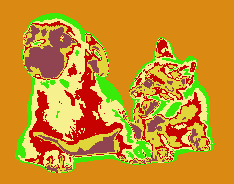

In [ ]:
img = cv.imread('dogcat.jpg')
print('Image source: ')
cv2_imshow(img)
print('-------------------------------------------------------------------------------------')
print('-------------------------------------------------------------------------------------')
print('image with FCM_RGB (r,g,b):')
model_RGB(img, opt = 2)